In [3]:
import pandas as pd
import numpy as np
import os

### **Data Preprocessing**

In [7]:
root = 'C:\\Users\\Krishna\\IIT MADRAS\\Molecular Data Science and Informatics\\Endsem'

In [8]:
data = root + '\\DataSet1.txt'
f=open(data,'r')
List_data=f.readlines()
List_data.pop(0)
List_data.pop(0)
poly=[]
Rg=[]
substring='\n'
for i in List_data:
    strin=i.split("   ")
    f=strin[1].split(substring)
    poly.append(strin[0])
    Rg.append(float(f[0]))
main=[poly,Rg]
df_data = pd.DataFrame(main).T
feature=df_data[0].to_numpy()
target=df_data[1].to_numpy()



In [19]:
sequence = feature
max_length = max(len(seq) for seq in sequence)
n_features = len(set(''.join(sequence)))
X = np.zeros((len(sequence), max_length, n_features))
for i, seq in enumerate(sequence):
    for j, char in enumerate(seq):
        X[i, j, int(char) - 1] = 1

In [20]:
y = target

### Model Building

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Flatten the input sequence for linear regression
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

def regression_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()
X_train = np.asarray(X_train,dtype='float32')
y_train = np.asarray(y_train,dtype='float32')
trial_fit = model.fit(X_train, y_train,epochs=100, verbose=1, validation_split=0.01)

Epoch 1/100
195/195 [==============================] - 1s 2ms/step - loss: 1.8774 - val_loss: 0.1267
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.1202 - val_loss: 0.1221
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0816 - val_loss: 0.0932
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0644 - val_loss: 0.0920
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0937
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0823
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0755
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0804
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.0879
Epoch 10/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0479 - val_lo

195/195 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0501
Epoch 82/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0606
Epoch 83/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0499
Epoch 84/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0554
Epoch 85/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0564
Epoch 86/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.0544
Epoch 87/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.0572
Epoch 88/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0525
Epoch 89/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.0528
Epoch 90/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 

In [25]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))


197/197 [==============================] - 0s 1ms/step
0.9345428496837637
0.9718136873882236


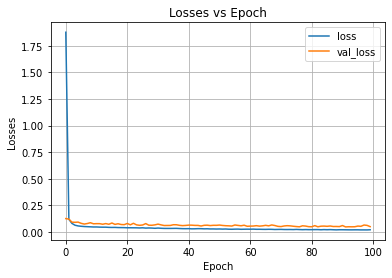

In [26]:
plt.figure()
plt.plot(trial_fit.history['loss'], label='loss')
plt.plot(trial_fit.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()
plt.show()

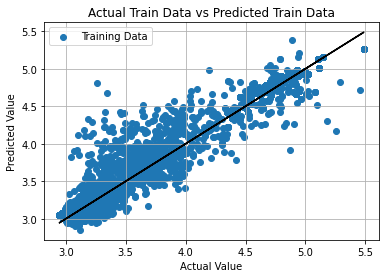

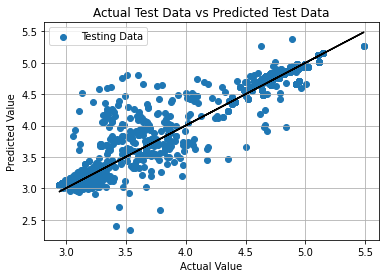

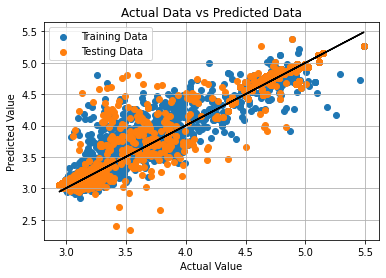

In [33]:
plt.scatter(y_train, y_pred_train,label='Training Data')
plt.title("Actual Train Data vs Predicted Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.plot(y_train, y_train, 'k-')
plt.grid()
plt.show()

plt.scatter(y_test, y_pred_test, label='Testing Data')
plt.title("Actual Test Data vs Predicted Test Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.plot(y_train, y_train, 'k-')
plt.grid()
plt.show()

plt.scatter(y_train, y_pred_train,label='Training Data')
plt.scatter(y_test, y_pred_test, label='Testing Data')
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.plot(y_train, y_train, 'k-')
plt.grid()
plt.show()